In [100]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

La integración usando la cuadratura de Gauss-Laguerre está pensada para una integral de la forma $ \int_{0}^{\infty}e^{-x}f(x)\,\mathrm{d}x $.

Por lo tanto, ya que se quiere obtener el valor de una integral de la forma $ \int_{0}^{\infty}f(x)\,\mathrm{d}x $, se tiene que introducir una función $ g(x) $ donde:
$$ g(x) = e^{x}f(x) $$
de modo que se pueda resolver de la forma:
$$ \int_{0}^{\infty}e^{-x}g(x)\,\mathrm{d}x $$
nótese que $ e^{-x}g(x) = e^{-x}e^{x}f(x) = f(x) $.

In [101]:
x = sym.Symbol('x',Real=True)

#Se define la función f(x) a integrar y la función g(x) a partir de esta (de forma simbólica y lambda).
f = (x**3)/(sym.exp(x)-1)
g = sym.exp(x)*((x**3)/(sym.exp(x)-1))
lg = sym.lambdify([x],g,"numpy")
lf = sym.lambdify([x],f,"numpy" )

#Se calcula la Integral exacta para compararla con los resultados obtenidos.
Iexacta = np.pi**4 / 15
sym.pi**4/15

pi**4/15

In [102]:
Iexacta

6.493939402266828

In [103]:
def Laguerre(n):
    """
    Retorna el polinomio de grado n-esimo de Laguerre (simbolico).
    """
    
    x = sym.Symbol('x',Real=True)
    y = sym.Symbol('y',Real=True)
    
    y = (np.e**(-x))*(x**n)
    
    p = (sym.diff(y,x,n)/(np.math.factorial(n)))*np.e**x
    
    return p

def Raices(f, domX, d=6):
    raices = []
    i=1
    raiz = None
    while (raiz != False) and (i <= len(domX)):
        x_1 = domX[n-i]
        raizNueva = round(NewtonRaphson(f,x_1),d)
        if raizNueva not in raices:
            raices.append(raizNueva)
        i+=1
    return raices

def Derivative(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)
    

def NewtonRaphson(f,x_1,lim=100):
    iteraciones = 0
    while (round(f(x_1),6) != 0) and (iteraciones <= lim):
        x_1 = x_1 - (f(x_1)/Derivative(f,x_1))
        iteraciones += 1
    
    if iteraciones > lim:
        return False
    else:
        return x_1
    
def GaussLaguerreIntegrate(f,n):
    """
    Recibe una función de la forma (e**(-x))f(x) para integrarla para (a,b) = (0, infinito).
    """
    domLag = np.linspace(0,80,200)
    sP = Laguerre(n)
    sP2 = Laguerre(n+1)
    P2 = sym.lambdify([x], sP2, "numpy")
    P = sym.lambdify([x], sP, "numpy")
    roots = sorted(Raices(P, domLag,d=5))
    weights = []

    for k in range(n):
        w_k = roots[k] / ( ((n+1)**2)*(P2(roots[k]))**2 )
        weights.append(w_k)
        
    I = 0
    
    for k in range(n):
        w_k = weights[k]
        r_k = roots[k]
        term = w_k * f(r_k)
        I += term
    
    return I

In [104]:
Inn = []
ns = np.linspace(2,10,9)

for n in range(2,11):
    I = GaussLaguerreIntegrate(lg,n)
    Inn.append(I)
    
In = np.array(Inn)

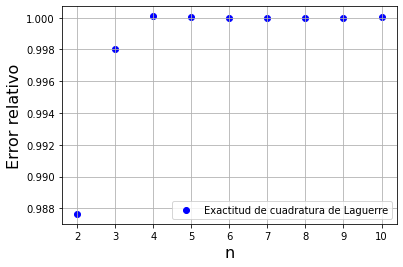

In [106]:
#ERROR RELATIVO
plt.scatter(ns,(In/Iexacta),label="Exactitud de cuadratura de Laguerre", color="#0000FF")
plt.grid()
plt.xlabel("n", size = 16,)
plt.ylabel("Error relativo", size = 16)
plt.legend()